In [1]:
import os
import sys
import warnings
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
warnings.filterwarnings('ignore')

In [2]:
import h5py
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parent_dir = os.path.dirname(os.getcwd())
dir = f"{parent_dir}/experiments/exp4/ksat"

WalkSAT running times

In [4]:
import torch
import h5py

num_proc = 10
batch_size = 250
ks = [8]
ns = [i for i in range(12, 20)]

mrts = {}
for k in ks:
	mrts[k] = {}
	for n in ns:
		# Initialise empty tensor for runtimes
		rt = torch.zeros(size=(num_proc * batch_size, ))
		for proc in range(num_proc):
			index = proc * batch_size
			filename = f'{dir}/res2/rt_{n}_{k}_{index}.hdf5' 
			with h5py.File(filename, 'r') as file:
				fresh = torch.from_numpy(file.get('times')[:])
				rt[index : index + batch_size] = fresh
		mrts[k][n] = torch.median(rt)

QAOA Running times

In [5]:
qmrts = {k : {n : {} for n in ns} for k in ks}

proc = 50
batch_size = 50
ps = [20, 24, 28, 32]
for k in ks:
	for n in ns:
		for p in ps:
			# Initialise empty tensor for runtimes
			rt = torch.zeros(size=(num_proc * batch_size, ))
			for proc in range(num_proc):
				index = proc * batch_size
				filename = f'{dir}/res3/rt_{n}_{k}_{p}_{index}.hdf5' 
				with h5py.File(filename, 'r') as file:
					fresh = torch.from_numpy(file.get('times')[:])
					rt[index : index + batch_size] = fresh
			qmrts[k][n][p] = torch.median(rt)

[0.2119994  2.16782929]
[ 0.26823033 -1.38894832]
[ 0.22625769 -1.72401084]


<Figure size 1500x1000 with 0 Axes>

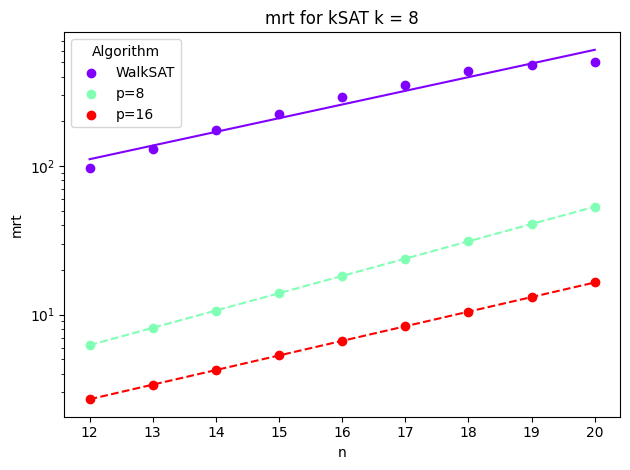

In [ ]:
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
mrt = mrts[k]

xs = list(mrt.keys())
ys = [mrt[n] for n in xs]
color = iter(plt.cm.rainbow(np.linspace(0, 1, 1 + len(ps))))

c = next(color)
# Points
ax.scatter(xs, ys, label='WalkSAT', color=c)

# Line of best fit
coefficients = np.polyfit(xs, np.log(ys), 1)
print(coefficients)
polynomial = np.poly1d(coefficients)
ax.plot(xs, np.exp(polynomial(xs)), color=c)

# QAOA
for p in ps:
	c = next(color)
	qaoa_polynomial = np.poly1d(qaoa_coeffs[k][p])
	print(qaoa_coeffs[k][p])
	ax.scatter(xs, np.exp(qaoa_polynomial(xs)), label=f'p={p}', color=c)
	ax.plot(xs, np.exp(qaoa_polynomial(xs)), linestyle='dashed', color=c)

ax.set_yscale('log')
ax.set_xlabel('n')
ax.set_ylabel('mrt')
ax.legend(title='Algorithm')
ax.set_title(f'mrt for kSAT k = {k}')

fig.tight_layout()
plt.show()